In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/zop
!ls

[Errno 2] No such file or directory: 'drive/MyDrive/zop'
/content/drive/MyDrive/zop
diabetes.csv  uzop_grupni_projekt.ipynb


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
def print_accuracies(alg):
    acc1, acc2, conf_matirces, precisions, recalls, f1_scores = [], [], [], [], [], []
    poly = PolynomialFeatures(3)
    X_translated = poly.fit_transform(X)
    for i in range(100):
        model = alg()
        
        X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), test_size=0.2)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        conf_mat = confusion_matrix(y_test, test_pred)
        conf_matirces.append(conf_mat)

        tn, fp, fn, tp = conf_mat.ravel()

        precision = tp/(tp + fp)
        precisions.append(precision)

        recall = tp/(tp+fn)
        recalls.append(recall)

        f1_score = 2 * (precision * recall)/(precision + recall)
        f1_scores.append(f1_score)

        acc1.append(accuracy_score(train_pred, y_train))
        acc2.append(accuracy_score(test_pred, y_test))

    print(f'Mean train accuracy: {np.mean(acc1)}')
    print(f'Mean test accuracy: {np.mean(acc2)}')
    print(f'Mean precision: {np.mean(precisions)}')
    print(f'Mean recall: {np.mean(recalls)}')
    print(f'Mean F1 score: {np.mean(f1_scores)}')
    print("Mean confusion matrix:")
    print(sum(conf_matirces)/len(conf_matirces))

In [4]:
def print_accuracies_logistic(alg):
    acc1, acc2, conf_matirces, precisions, recalls, f1_scores = [], [], [], [], [], []
    poly = PolynomialFeatures(3)
    X_translated = poly.fit_transform(X)
    for i in range(100):
        model = alg()

        X_train, X_test, y_train, y_test = train_test_split(X_translated, y.values.reshape(-1), test_size=0.2)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        conf_mat = confusion_matrix(y_test, test_pred)
        conf_matirces.append(conf_mat)

        tn, fp, fn, tp = conf_mat.ravel()

        precision = tp/(tp + fp)
        precisions.append(precision)

        recall = tp/(tp+fn)
        recalls.append(recall)

        f1_score = 2 * (precision * recall)/(precision + recall)
        f1_scores.append(f1_score)

        acc1.append(accuracy_score(train_pred, y_train))
        acc2.append(accuracy_score(test_pred, y_test))

    print(f'Mean train accuracy: {np.mean(acc1)}')
    print(f'Mean test accuracy: {np.mean(acc2)}')
    print(f'Mean precision: {np.mean(precisions)}')
    print(f'Mean recall: {np.mean(recalls)}')
    print(f'Mean F1 score: {np.mean(f1_scores)}')
    print("Mean confusion matrix:")
    print(sum(conf_matirces)/len(conf_matirces))

# Removing outliers

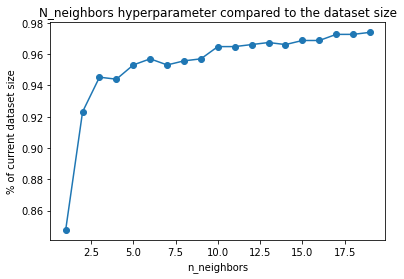

In [5]:
from sklearn.neighbors import LocalOutlierFactor

y = df['Outcome']
X = df.drop(columns=['Outcome'])

d = {}
for i in range(1, 20):
    lof = LocalOutlierFactor(n_neighbors=i)
    X_out = lof.fit_predict(X)
    d[i] = np.sum(X_out == 1)/len(X_out)

plt.plot(list(d.keys()), list(d.values()), '-o')
plt.xlabel('n_neighbors')
plt.ylabel('% of current dataset size')
plt.title('N_neighbors hyperparameter compared to the dataset size')
plt.show()

In [6]:
lof = LocalOutlierFactor(n_neighbors=4)
X_out = lof.fit_predict(X)

mask = X_out != -1

X = X.loc[mask, :]
y = y.loc[mask]

df = X[:]
df['Outcome'] = y[:]

print(len(X))
print(len(y))
print(len(df))

725
725
725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
display(df[df['Pregnancies'] > 13])
df = df[df['Pregnancies'] <= 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [8]:
display(df[df['Glucose'] > 200])
df = df[df['Glucose'] <= 200]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
display(df[df['BloodPressure'] > 115])
df = df[df['BloodPressure'] <= 115]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
display(df[(df['BloodPressure'] < 40) & (df['BloodPressure'] != 0)])
df = df[(df['BloodPressure'] >= 40) | (df['BloodPressure'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
599,1,109,38,18,120,23.1,0.407,26,0


In [11]:
display(df[df['SkinThickness'] > 65])
df = df[df['SkinThickness'] <= 65]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
display(df[(df['Insulin'] > 500) & (df['Outcome'] == 0)])
df = df[(df['Insulin'] <= 500) | (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
286,5,155,84,44,545,38.7,0.619,34,0


In [13]:
display(df[(df['BMI'] > 50) & (df['Outcome'] == 0)])
df = df[(df['BMI'] <= 50) | (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
673,3,123,100,35,240,57.3,0.88,22,0


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.811978,120.683844,69.470752,20.278552,78.803621,31.955571,0.464336,32.997214,0.346797
std,3.246201,31.410967,18.110419,15.613010,108.080458,7.202455,0.319024,11.409824,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238250,24.000000,0.000000
50%,3.000000,116.500000,72.000000,23.000000,36.500000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.375000,0.613750,40.000000,1.000000
max,13.000000,199.000000,110.000000,60.000000,600.000000,52.300000,2.288000,70.000000,1.000000


# Removing missing values

In [15]:
print('      Glucose missing values: ',len(df[df['Glucose'] == 0.0]))
print('BloodPressure missing values: ',len(df[df['BloodPressure'] == 0.0]))
print('SkinThickness missing values: ',len(df[df['SkinThickness'] == 0.0]))
print('          BMI missing values: ',len(df[df['BMI'] == 0.0]))

      Glucose missing values:  5
BloodPressure missing values:  29
SkinThickness missing values:  214
          BMI missing values:  7


In [16]:
df.loc[df['Glucose'] == 0.0, 'Glucose'] = np.nan
df.loc[df['BMI'] == 0.0, 'BMI'] = np.nan
df.loc[df['SkinThickness'] == 0.0, 'SkinThickness'] = np.nan
df.loc[df['BloodPressure'] == 0.0, 'BloodPressure'] = np.nan
df = df.interpolate()

# Feature engineering

In [17]:
X = df.drop(columns=['Outcome'])
y = df[['Outcome']]

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0  ...  33.6                     0.627   50
1            1     85.0           66.0  ...  26.6                     0.351   31
2            8    183.0           64.0  ...  23.3                     0.672   32
3            1     89.0           66.0  ...  28.1                     0.167   21
4            0    137.0           40.0  ...  43.1                     2.288   33

[5 rows x 8 columns]
   Outcome
0        1
1        0
2        1
3        0
4        1


In [ ]:
# plt.figure(figsize=(15, 15))
# sb.pairplot(df, hue='Outcome')

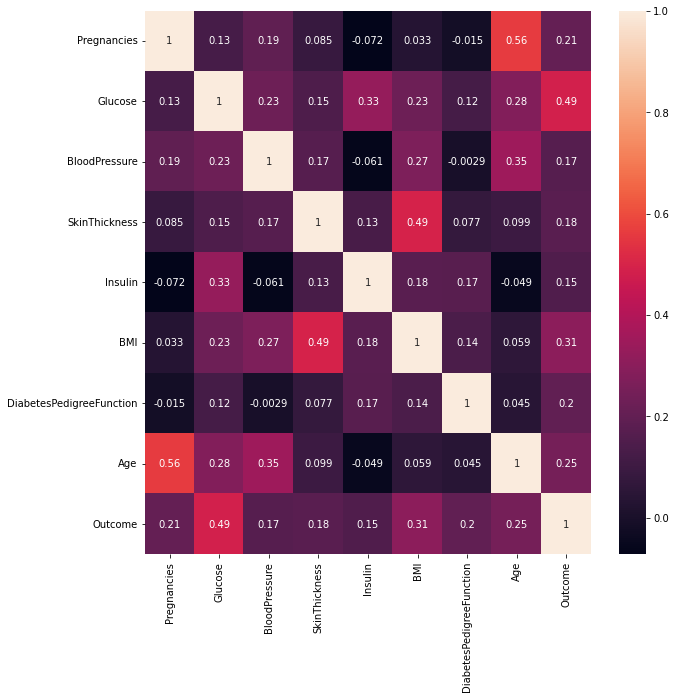

In [ ]:
# plt.figure(figsize=(10, 10))
# sb.heatmap(df.corr(),  annot=True)

In [18]:
!pip install autofeat

In [19]:
from autofeat import AutoFeatRegressor, AutoFeatClassifier
model = AutoFeatRegressor(verbose=1, feateng_steps=3)
X = model.fit_transform(X, y.values.reshape(-1))

[AutoFeat] The 3 step feature engineering process could generate up to 38556 features.
[AutoFeat] With 718 data points this new feature matrix would use about 0.11 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 37 transformed features from 8 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 3875 feature combinations from 990 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 14500 transformed features from 3875 original features - done.
[feateng] Generated altogether 20138 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 8148 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 29 fe

In [20]:
print(np.array(X.columns.tolist()))

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age'
 'log(sqrt(DiabetesPedigreeFunction)*Glucose**2)'
 '(sqrt(Pregnancies) + log(DiabetesPedigreeFunction))**2' 'BMI*Glucose'
 '1/(Age**2 + Pregnancies**3)'
 '1/(-sqrt(Pregnancies) + log(SkinThickness))'
 '(-BloodPressure + Glucose)**2' 'Age**6/BMI**3' '(1/BMI - 1/Age)**2'
 'Age**6/BloodPressure**3' 'exp(sqrt(BMI) - Insulin)']


In [79]:
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV
n_iter=100
params={
    'max_depth': list(range(3,10)),
    'n_estimators' : list(range(50,200,10)),
    'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
    'reg_alpha': [0.01,0.1,1,2,4,8,16,32,64],
    'reg_lambda': [0.01,0.1,1,2,4,8,16,32,64]
}
grid=RandomizedSearchCV(
    estimator=clf, param_distributions=params, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    verbose=True)
model = lgbm.LGBMClassifier(silent=True, metric='None',**params)
model.fit(X,y)
# print("Best params:",grid.best_estimator_)

acc1, acc2 = [], []
for i in range(100):
  

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  acc1.append(accuracy_score(train_pred, y_train))
  acc2.append(accuracy_score(test_pred, y_test))

print(f'Mean train accuracy: {np.mean(acc1)}')
print(f'Mean test accuracy: {np.mean(acc2)}')
!pip uninstall featurewiz
!pip install --force-reinstall featurewiz==0.0.63 

NameError: ignored

Imported DASK version = 0.0.63. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=True, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (580, 17)
Loading test data...
    No file given. Continuing...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
GPU active on this device
    Running XGBoost using GPU parameters
Removing 0 columns from further processing s

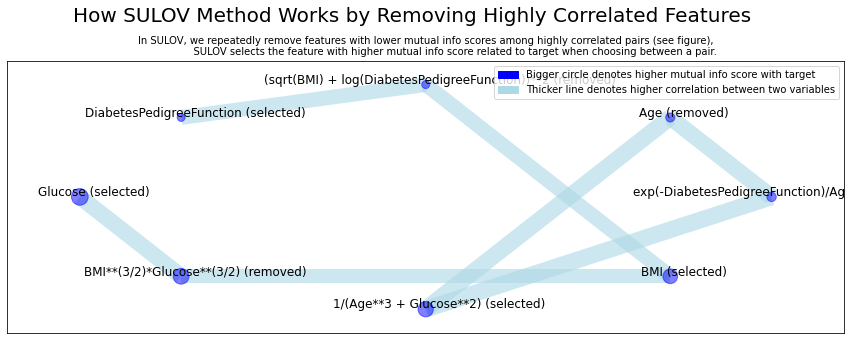

    Adding 0 categorical variables to reduced numeric variables  of 12
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 12 
    Finding Important Features using Boosted Trees algorithm...
        using 12 variables...
        using 10 variables...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...


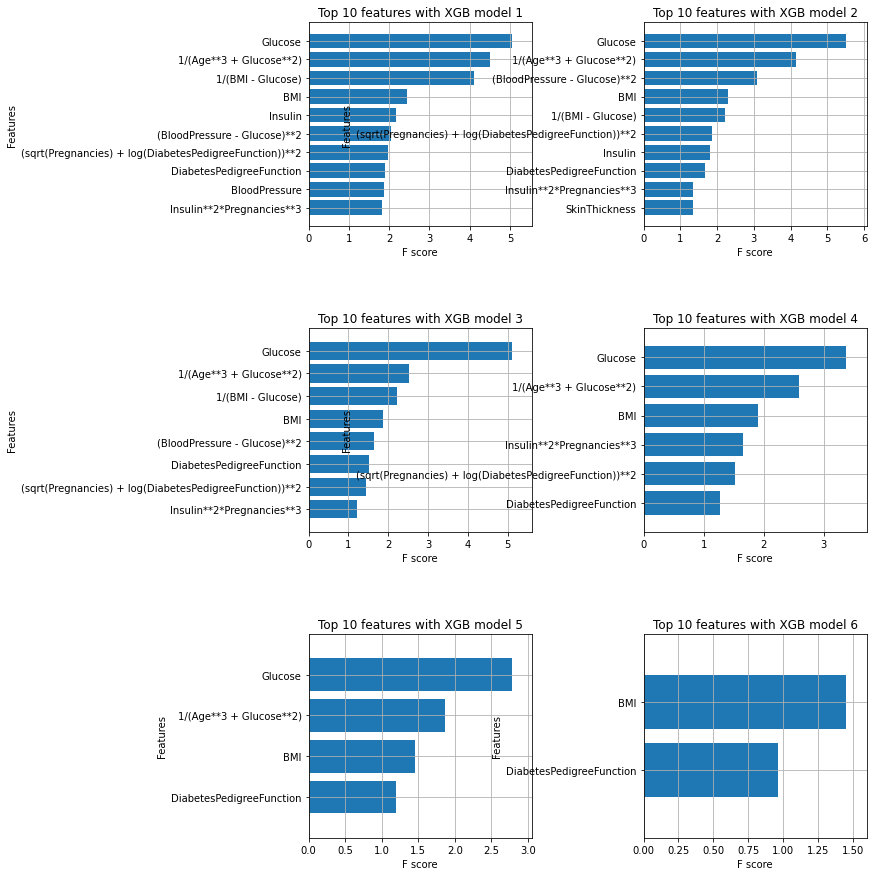

Selected 11 important features:
['Glucose', '1/(Age**3 + Glucose**2)', '1/(BMI - Glucose)', 'BMI', 'Insulin', '(BloodPressure - Glucose)**2', '(sqrt(Pregnancies) + log(DiabetesPedigreeFunction))**2', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin**2*Pregnancies**3', 'SkinThickness']
    Time taken = 4 seconds
Returning list of 11 important features and dataframe.


In [ ]:
import pandas as pd
from featurewiz import featurewiz

tmp = X[:]
tmp['Outcome'] = y.values

df_train = tmp.sample(frac=0.8)
features1 = featurewiz(
    df_train,
    target='Outcome', 
    corr_limit=0.70, 
    verbose=2,
    dask_xgboost_flag=False
)

df_train = df_train[features1[1].columns.tolist()]
df_test = tmp[df_train.columns.tolist()].drop(df_train.index)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(df_train.drop(columns=['Outcome']), df_train['Outcome'])
print(search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'],'\n')

pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier())
])
params = {
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(df_train.drop(columns=['Outcome']), df_train['Outcome'])
print(search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'], '\n')

NameError: ignored

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline1 = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier(27))
])
pipeline2 = Pipeline(steps=[
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier(19))
])

X_train, y_train = df_train.drop(columns=['Outcome']), df_train['Outcome']
X_test, y_test = df_test.drop(columns=['Outcome']), df_test['Outcome']

pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)

print(f'1st model acc: {accuracy_score(pipeline1.predict(X_test), y_test)}')
print(f'2nd model acc: {accuracy_score(pipeline2.predict(X_test), y_test)}')

NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector, f_classif
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('f_sel', SelectKBest()), ('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
params = {
    'f_sel__score_func': [f_classif],
    'f_sel__k': list(range(1, len(X.columns.tolist())+1)),
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'].values.reshape(-1))
print(search.best_score_)
print(search.best_params_)

pipeline = Pipeline(steps=[('f_sel', SelectKBest()), ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
params = {
    'f_sel__score_func': [f_classif],
    'f_sel__k': list(range(1, len(X.columns.tolist())+1)),
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(X, y)
print(search.best_score_)
print(search.best_params_)

In [ ]:
acc1, acc2 = [], []
for i in range(100):
    pipeline1 = Pipeline(steps=[('f_sel', SelectKBest(k=12, score_func=f_classif)), ('scaler', StandardScaler()), ('knn', KNeighborsClassifier(22))])
    pipeline2 = Pipeline(steps=[('f_sel', SelectKBest(k=12, score_func=f_classif)), ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(24))])

    X_train, X_test, y_train, y_test = train_test_split(X, y['Outcome'], test_size=0.2)

    pipeline1.fit(X_train, y_train)
    pipeline2.fit(X_train, y_train)

    acc1.append(accuracy_score(pipeline1.predict(X_test), y_test))
    acc2.append(accuracy_score(pipeline2.predict(X_test), y_test))

print(f'1st model acc: {np.mean(acc1)}')
print(f'2nd model acc: {np.mean(acc2)}')

1st model acc: 0.766111111111111
2nd model acc: 0.7602777777777777


# Deep learning model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta, Adamax
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1, l2
from keras.initializers import HeNormal, HeUniform, GlorotUniform, GlorotNormal
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
y2 = df_train['Outcome'].values.reshape(-1)
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['Outcome']).to_numpy(), y2, test_size=0.2, shuffle=True)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = Sequential()

model.add(Dense(
    1000,
    kernel_regularizer=l1(1e-3),
    kernel_initializer=HeNormal(),
    activation='relu',
    input_shape=(len(df_train.columns.tolist())-1,))
)

model.add(Dense(
    1000,
    kernel_regularizer=l1(1e-3),
    kernel_initializer=HeUniform(),
    activation='relu')
)

# model.add(Dropout(0.25))
# model.add(Flatten())

model.add(Dense(
    units=1,
    kernel_regularizer=l1(1e-3),
    activation='sigmoid')
)

model.compile(
    optimizer=Adam(learning_rate=0.0009),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

class_weight = compute_class_weight(y=y2, classes=np.unique(y2), class_weight='balanced')

num_epochs = 1000
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    class_weight={0: class_weight[0], 1: class_weight[1]},
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=70, restore_best_weights=True)]
)

Epoch 1/1000
8/8 [==============================] - 4s 151ms/step - loss: 41.7884 - accuracy: 0.6776 - val_loss: 39.1716 - val_accuracy: 0.7478
Epoch 2/1000
8/8 [==============================] - 0s 47ms/step - loss: 37.6564 - accuracy: 0.7669 - val_loss: 35.4474 - val_accuracy: 0.7391
Epoch 3/1000
8/8 [==============================] - 0s 59ms/step - loss: 33.7938 - accuracy: 0.8083 - val_loss: 31.8563 - val_accuracy: 0.7391
Epoch 4/1000
8/8 [==============================] - 0s 44ms/step - loss: 30.1339 - accuracy: 0.8148 - val_loss: 28.4430 - val_accuracy: 0.7391
Epoch 5/1000
8/8 [==============================] - 0s 43ms/step - loss: 26.7198 - accuracy: 0.7996 - val_loss: 24.9550 - val_accuracy: 0.7652
Epoch 6/1000
8/8 [==============================] - 0s 52ms/step - loss: 23.5449 - accuracy: 0.8562 - val_loss: 22.0073 - val_accuracy: 0.7391
Epoch 7/1000
8/8 [==============================] - 0s 47ms/step - loss: 20.6317 - accuracy: 0.8431 - val_loss: 19.3775 - val_accuracy: 0.773

In [ ]:
print(accuracy_score(model.predict(df_test.drop(columns=['Outcome']).values), y_test))

0.6666666666666666


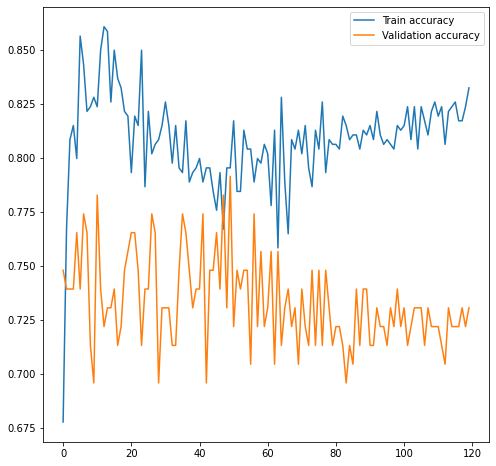

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Train accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# Logisticka regresija

In [24]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel,SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

**Prvi pipeline:**
StandardScaler, SelectKBest feature selector s preslikavanjem podataka u trecu dimenziju: (3 min runtime)

In [25]:
pipeline = Pipeline(steps=[('fs',SelectKBest()), ('scaler', StandardScaler()),('log_reg', LogisticRegression(solver='liblinear', max_iter=1000, tol=0.0001))])
params = {
    'log_reg__C': [i*(10**y) for y in range(-5, 5) for i in range(1, 3)],
    'log_reg__penalty': ['l1', 'l2'],
    'fs__score_func':[f_classif],
    'fs__k':list(range((len(X.columns)-3),(len(X.columns))))
}

poly = PolynomialFeatures(3)
X_translated = poly.fit_transform(X)

search = GridSearchCV(pipeline, params)
search.fit(X_translated, y['Outcome'].values.reshape(-1))
bp = search.best_params_
print(search.best_score_)
print(search.best_params_) 

0.7688325563325564
{'fs__k': 15, 'fs__score_func': <function f_classif at 0x7f47b2cb5680>, 'log_reg__C': 0.2, 'log_reg__penalty': 'l1'}


In [26]:
print_accuracies_logistic(
    lambda:
    Pipeline(steps=[
            ('fs',SelectKBest(
                score_func=bp['fs__score_func'],
                k=bp['fs__k']
                )
            ),
            ('scaler', StandardScaler()), 
            ('log_reg', LogisticRegression(
                solver='liblinear', 
                max_iter=1000, 
                tol=0.0001,
                C=bp['log_reg__C'],
                penalty=bp['log_reg__penalty']))
    ])
)

Mean train accuracy: 0.771794425087108
Mean test accuracy: 0.7613194444444445
Mean precision: 0.7131099202935043
Mean recall: 0.5294817488488889
Mean F1 score: 0.6037284339455739
Mean confusion matrix:
[[83.2  10.81]
 [23.56 26.43]]


**Drugi pipeline:**
MinMaxScaler, SelectKBest feature selector s preslikavanjem podataka u trecu dimenziju: (6 min runtime)

In [27]:
pipeline = Pipeline(steps=[('fs',SelectKBest()), ('scaler', MinMaxScaler()),('log_reg', LogisticRegression(solver='liblinear', max_iter=1000, tol=0.0001))])
params = {
    'log_reg__C': [i*(10**y) for y in range(-5, 5) for i in range(1, 3)],
    'log_reg__penalty': ['l1', 'l2'],
    'fs__score_func':[f_classif],
    'fs__k':list(range((len(X.columns)-3),(len(X.columns))))
}

poly = PolynomialFeatures(3)
X_translated = poly.fit_transform(X)

search = GridSearchCV(pipeline, params)
search.fit(X_translated, y['Outcome'].values.reshape(-1))
bp = search.best_params_
print(search.best_score_)
print(search.best_params_) 

0.7688228438228438
{'fs__k': 15, 'fs__score_func': <function f_classif at 0x7f47b2cb5680>, 'log_reg__C': 2, 'log_reg__penalty': 'l1'}


In [28]:
print_accuracies_logistic(
    lambda:
    Pipeline(steps=[
            ('fs',SelectKBest(
                score_func=bp['fs__score_func'],
                k=bp['fs__k']
                )
            ),
            ('scaler', MinMaxScaler()), 
            ('log_reg', LogisticRegression(
                solver='liblinear', 
                max_iter=1000, 
                tol=0.0001,
                C=bp['log_reg__C'],
                penalty=bp['log_reg__penalty']))
    ])
)

Mean train accuracy: 0.7712891986062719
Mean test accuracy: 0.7634722222222223
Mean precision: 0.7231806716860131
Mean recall: 0.5210289244415182
Mean F1 score: 0.6018222320231628
Mean confusion matrix:
[[83.93 10.02]
 [24.04 26.01]]


**Treci pipeline:**
StandardScaler, RFE feature selector s preslikavanjem podataka u trecu dimenziju: (runtime nepoznat, vise od 20 min)

In [ ]:
pipeline = Pipeline(steps=[('fs', RFE(estimator=RandomForestClassifier())), ('scaler', StandardScaler()),('log_reg', LogisticRegression(solver='liblinear', max_iter=1000, tol=0.0001))])
params = {
    'log_reg__C': [i*(10**y) for y in range(-5, 5) for i in range(1, 3)],
    'log_reg__penalty': ['l1', 'l2'],
    'fs__n_features_to_select':[(len(X.columns)-1)]
}

poly = PolynomialFeatures(3)
X_translated = poly.fit_transform(X)

search = GridSearchCV(pipeline, params)
search.fit(X_translated, y['Outcome'].values.reshape(-1))
bp = search.best_params_
print(search.best_score_)
print(search.best_params_)

In [ ]:
print_accuracies_logistic(
    lambda:
    Pipeline(steps=[
            ('fs',RFE(
                estimator=RandomForestClassifier(),
                n_features_to_select=bp['fs__n_features_to_select']
            )
            ),
            ('scaler', StandardScaler()),
            ('log_reg', LogisticRegression(
                solver='liblinear', 
                max_iter=1000, 
                tol=0.0001,
                C=bp['log_reg__C'],
                penalty=bp['log_reg__penalty']))
    ])
)

**Cetvrti pipeline:**
MinMaxScaler, RFE feature selector s preslikavanjem podataka u trecu dimenziju: (runtime nepoznat)

In [ ]:
pipeline = Pipeline(steps=[('fs', RFE(estimator=RandomForestClassifier())), ('scaler', MinMaxScaler()),('log_reg', LogisticRegression(solver='liblinear', max_iter=1000, tol=0.0001))])
params = {
    'log_reg__C': [i*(10**y) for y in range(-5, 5) for i in range(1, 3)],
    'log_reg__penalty': ['l1', 'l2'],
    'fs__n_features_to_select':[(len(X.columns)-1)]
}

poly = PolynomialFeatures(3)
X_translated = poly.fit_transform(X)

search = GridSearchCV(pipeline, params)
search.fit(X_translated, y['Outcome'].values.reshape(-1))
bp = search.best_params_
print(search.best_score_)
print(search.best_params_)

In [ ]:
print_accuracies_logistic(
    lambda:
    Pipeline(steps=[
            ('fs',RFE(
                estimator=RandomForestClassifier(),
                n_features_to_select=bp['fs__n_features_to_select']
            )
            ),
            ('scaler', MinMaxScaler()), 
            ('log_reg', LogisticRegression(
                solver='liblinear', 
                max_iter=1000, 
                tol=0.0001,
                C=bp['log_reg__C'],
                penalty=bp['log_reg__penalty']))
    ])
)

# Algoritam K najblizih susjeda

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,100))
weight_options = ["uniform", "distance"]

param_grid_knn = dict(n_neighbors = k_range, weights = weight_options)

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'accuracy')
knn_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(knn_model.best_params_)
print(knn_model.score(X_test, y_test))

{'n_neighbors': 20, 'weights': 'uniform'}
0.734375


#LightGBM 

In [ ]:
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV
params={
    'max_depth':list(range(3,10)),
    'learning_rate':[0.1,0.2,0.3,0.4],
    'n_estimators':list(range(50,200,25)),
    'reg_alpha':[0.01,0.1,1,2,4],
    'reg_lambda':[0.01,0.1,1,2,4]
}
n_iters=100
rscv=RandomizedSearchCV(estimator=lgbm.LGBMClassifier(),param_distributions=params,n_iter=n_iters)
rscv.fit(X,y)


RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [50, 75, 100, 125, 150,
                                                         175],
                                        'reg_alpha': [0.01, 0.1, 1, 2, 4],
                                        'reg_lambda': [0.01, 0.1, 1, 2, 4]})

In [ ]:
print(rscv.best_params_)
print(rscv.best_score_)
rscv.best_params_['reg_alpha']=16
# rscv.best_params_['reg_lambda']=1
# rscv.best_params_['max_depth']=5
acc1, acc2 = [], []
for i in range(100):
  model = lgbm.LGBMClassifier(**rscv.best_params_)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  acc1.append(accuracy_score(train_pred, y_train))
  acc2.append(accuracy_score(test_pred, y_test))

print(f'Mean train accuracy: {np.mean(acc1)}')
print(f'Mean test accuracy: {np.mean(acc2)}')

{'reg_lambda': 4, 'reg_alpha': 1, 'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.1}
0.7655172413793103
Mean train accuracy: 0.9282241379310343
Mean test accuracy: 0.7561379310344826


# Ansambli - ovako popravite logisticku

In [ ]:
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel,SelectKBest, chi2, f_classif,RFE

In [ ]:
pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ('ensemble', RandomForestClassifier())])

params = {
    'ensemble__n_estimators': list(range(2, 30)),
    'ensemble__criterion': ['gini', 'entropy'],
    'ensemble__max_depth': list(range(2, 20)),
    'ensemble__class_weight': ['balanced', 'balanced_subsample', None]
}

search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])

bp = search.best_params_
print(search.best_score_)
print(search.best_params_)

0.7891858237547893
{'ensemble__class_weight': None, 'ensemble__criterion': 'gini', 'ensemble__max_depth': 15, 'ensemble__n_estimators': 28}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('scaler', MinMaxScaler()), 
            ('ensemble', RandomForestClassifier(
                class_weight=bp['ensemble__class_weight'], 
                criterion=bp['ensemble__criterion'], 
                max_depth=bp['ensemble__max_depth'], 
                n_estimators=bp['ensemble__n_estimators']
                )
            )
    ])
)

Mean train accuracy: 0.8307586206896553
Mean test accuracy: 0.763241379310345


In [ ]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('ensemble', RandomForestClassifier())])

params = {
    'ensemble__n_estimators': list(range(2, 40)),
    'ensemble__criterion': ['gini', 'entropy'],
    'ensemble__max_depth': list(range(2, 15)),
    'ensemble__class_weight': ['balanced', 'balanced_subsample', None]
}

search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])
bp = search.best_params_
print(search.best_score_)
print(search.best_params_)

0.7823180076628352
{'ensemble__class_weight': 'balanced_subsample', 'ensemble__criterion': 'entropy', 'ensemble__max_depth': 4, 'ensemble__n_estimators': 30}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('scaler', StandardScaler()), 
            ('ensemble', RandomForestClassifier(
                class_weight=bp['ensemble__class_weight'], 
                criterion=bp['ensemble__criterion'], 
                max_depth=bp['ensemble__max_depth'], 
                n_estimators=bp['ensemble__n_estimators']
                )
            )
    ])
)

Mean train accuracy: 0.8191145833333334
Mean test accuracy: 0.7644137931034483


In [ ]:
pipeline = Pipeline(steps=[('fs',SelectFromModel(RandomForestClassifier(), threshold = 0.1)),('scaler', StandardScaler()), ('ensemble', RandomForestClassifier())])
params = {
    'ensemble__n_estimators': list(range(15, 30)),
    'ensemble__criterion': ['gini', 'entropy'],
    'ensemble__max_depth': list(range(3, 10)),
    'ensemble__class_weight': ['balanced', 'balanced_subsample', None]
}
search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])
bp = search.best_params_
print(search.best_score_)
print(search.best_params_)


0.7641379310344827
{'ensemble__class_weight': None, 'ensemble__criterion': 'gini', 'ensemble__max_depth': 3, 'ensemble__n_estimators': 21}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('fs',SelectFromModel(RandomForestClassifier(), threshold = 0.1)),
            ('scaler', StandardScaler()), 
            ('ensemble', RandomForestClassifier(
                class_weight=bp['ensemble__class_weight'], 
                criterion=bp['ensemble__criterion'], 
                max_depth=bp['ensemble__max_depth'], 
                n_estimators=bp['ensemble__n_estimators']
                )
            )
    ])
)

Mean train accuracy: 0.7823103448275862
Mean test accuracy: 0.7569655172413792


In [ ]:
pipeline = Pipeline(steps=[('fs',SelectKBest()),('scaler', StandardScaler()),('ensemble', RandomForestClassifier())])
params = {
    'ensemble__n_estimators': list(range(15, 30)),
    'ensemble__criterion': ['gini', 'entropy'],
    'ensemble__max_depth': list(range(4, 10)),
    'ensemble__class_weight': ['balanced', 'balanced_subsample', None],
    'fs__score_func':[f_classif],
    'fs__k':list(range((len(X.columns)-3),(len(X.columns))))
}
search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])
bp = search.best_params_
print(search.best_score_)
print(search.best_params_) 


0.7862068965517242
{'ensemble__class_weight': 'balanced_subsample', 'ensemble__criterion': 'entropy', 'ensemble__max_depth': 9, 'ensemble__n_estimators': 24, 'fs__k': 15, 'fs__score_func': <function f_classif at 0x7f791c9b5b00>}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('fs',SelectKBest(
                score_func=bp['fs__score_func'],
                k=bp['fs__k']
                )
            ),
            ('scaler', StandardScaler()), 
            ('ensemble', RandomForestClassifier(
                class_weight=bp['ensemble__class_weight'], 
                criterion=bp['ensemble__criterion'], 
                max_depth=bp['ensemble__max_depth']-5, 
                n_estimators=bp['ensemble__n_estimators']
                )
            )
    ])
)

Mean train accuracy: 0.8170344827586206
Mean test accuracy: 0.7628965517241382


In [ ]:
pipeline = Pipeline(steps=[('fs',SelectKBest()),('scaler', StandardScaler()),('ensemble', RandomForestClassifier())])
params = {
    'ensemble__n_estimators': list(range(15, 30)),
    'ensemble__criterion': ['gini', 'entropy'],
    'ensemble__max_depth': [5],
    'ensemble__class_weight': ['balanced', 'balanced_subsample', None],
    'fs__score_func':[f_classif],
    'fs__k':list(range((len(X.columns)-3),(len(X.columns))))
}
# za 4 0.7588 na testu
search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])
bp = search.best_params_
print(search.best_score_)
print(search.best_params_) 

0.7779310344827586
{'ensemble__class_weight': 'balanced', 'ensemble__criterion': 'entropy', 'ensemble__max_depth': 5, 'ensemble__n_estimators': 21, 'fs__k': 15, 'fs__score_func': <function f_classif at 0x7f791c9b5b00>}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('fs',SelectKBest(
                score_func=bp['fs__score_func'],
                k=bp['fs__k']
                )
            ),
            ('scaler', StandardScaler()), 
            ('ensemble', RandomForestClassifier(
                class_weight=bp['ensemble__class_weight'], 
                criterion=bp['ensemble__criterion'], 
                max_depth=bp['ensemble__max_depth'], 
                n_estimators=bp['ensemble__n_estimators']
                )
            )
    ])
)

Mean train accuracy: 0.8452758620689655
Mean test accuracy: 0.7632413793103447


In [ ]:
pipeline = Pipeline(steps=[('fs',RFE(estimator=RandomForestClassifier())),('scaler', StandardScaler()),('ensemble', RandomForestClassifier())])
# print(X.columns)
params = {
    'ensemble__n_estimators': list(range(20, 30)),
    'ensemble__criterion': ['gini', 'entropy'],
    'ensemble__max_depth': list(range(4, 10)),
    'ensemble__class_weight': ['balanced', 'balanced_subsample', None],
    'fs__n_features_to_select':[(len(X.columns)-1)]
}
search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])
bp = search.best_params_
print(search.best_score_)
print(search.best_params_) 

0.7779310344827587
{'ensemble__class_weight': 'balanced', 'ensemble__criterion': 'entropy', 'ensemble__max_depth': 6, 'ensemble__n_estimators': 28, 'fs__n_features_to_select': 15}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('fs', RFE(
                estimator=RandomForestClassifier(),
                n_features_to_select=bp['fs__n_features_to_select']
                )
            ),
            ('scaler', StandardScaler()), 
            ('ensemble', RandomForestClassifier(
                class_weight=bp['ensemble__class_weight'], 
                criterion=bp['ensemble__criterion'], 
                max_depth=bp['ensemble__max_depth']-2, 
                n_estimators=bp['ensemble__n_estimators'],
                )
            )
    ])
)

Mean train accuracy: 0.8190172413793104
Mean test accuracy: 0.7642758620689655


In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline(steps=[('fs',SelectKBest()),('dtc', DecisionTreeClassifier())])
# print(X.columns)
params = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [3,4,5,6,7],
    'dtc__max_features': ['auto', 'sqrt', 'log2'],
    'dtc__class_weight': ['balanced', None],
    'fs__score_func':[f_classif],
    'fs__k':list(range((len(X.columns)-10),len(X.columns)))
}
search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'])
bp = search.best_params_
print(search.best_score_)
print(search.best_params_) 

0.7627586206896553
{'dtc__class_weight': None, 'dtc__criterion': 'gini', 'dtc__max_depth': 3, 'dtc__max_features': 'log2', 'fs__k': 6, 'fs__score_func': <function f_classif at 0x7f791c9b5b00>}


In [ ]:
print_accuracies(
    lambda:
    Pipeline(steps=[
            ('fs', SelectKBest(
                score_func=bp['fs__score_func'],
                k=bp['fs__k']
                )
            ),
            ('ensemble', DecisionTreeClassifier(
                class_weight=bp[ 'dtc__class_weight'] ,
                criterion=bp['dtc__criterion'], 
                max_depth=bp['dtc__max_depth'], 
                max_features=bp['dtc__max_features'],
                )
            )
    ])
)

Mean train accuracy: 0.7751551724137932
Mean test accuracy: 0.7364827586206896


In [ ]:
model1 = log_reg = LogisticRegression(max_iter=1000, tol=0.0001)

model2 = KNeighborsClassifier(n_neighbors = 16, weights = 'uniform')

model3 = svm.SVC(C = 64, gamma = 0.03125, kernel = 'rbf')

model4 = tree.DecisionTreeClassifier()

model5 = GaussianNB()

model6 = RandomForestClassifier()

In [ ]:
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('NB',model5), ('RF',model6)]

In [ ]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y)

In [ ]:
kfold = StratifiedKFold(n_splits=10)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc, y_train_sc, cv=kfold)
print('Accuracy on train: ', results.mean())
ensemble_model = ensemble.fit(X_train_sc, y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7621899576527525
Accuracy on test: 0.7760416666666666
